<a href="https://colab.research.google.com/github/kjcoursera/Tableau/blob/master/MultiClas_Classification_Using_SoftMax_MINSTdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


**Load the Dataset**

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
x_train[1917]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26, 207, 253, 255,  27,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  29, 200, 252, 252, 253,  27,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  26, 200, 252, 252, 220, 133,   6,   0,   0,   0,   0,
          0,   0],
       [  

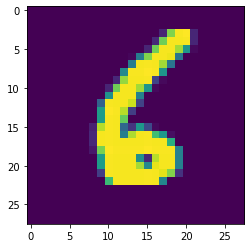

In [12]:
plt.imshow(x_train[1917])

In [13]:
# Output row #10 of example #2917.
x_train[2917][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [14]:
# Output pixel #16 of row #10 of example #2900.
x_train[2917][10][16]

58

**Normalize the feature values**

In [15]:
x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0
print(x_train_normalized[2900][12]) # Output a normalized row

[0.         0.         0.         0.         0.         0.
 0.         0.55294118 0.88627451 0.22352941 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [21]:

def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [22]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist   

Epoch 1/50
12/12 [==============================] - 0s 37ms/step - loss: 1.6469 - accuracy: 0.4756 - val_loss: 0.9029 - val_accuracy: 0.7897
Epoch 2/50
12/12 [==============================] - 0s 23ms/step - loss: 0.8522 - accuracy: 0.7385 - val_loss: 0.5079 - val_accuracy: 0.8695
Epoch 3/50
12/12 [==============================] - 0s 23ms/step - loss: 0.6031 - accuracy: 0.8186 - val_loss: 0.3958 - val_accuracy: 0.8979
Epoch 4/50
12/12 [==============================] - 0s 22ms/step - loss: 0.5002 - accuracy: 0.8511 - val_loss: 0.3405 - val_accuracy: 0.9070
Epoch 5/50
12/12 [==============================] - 0s 23ms/step - loss: 0.4439 - accuracy: 0.8700 - val_loss: 0.3074 - val_accuracy: 0.9154
Epoch 6/50
12/12 [==============================] - 0s 24ms/step - loss: 0.4074 - accuracy: 0.8811 - val_loss: 0.2864 - val_accuracy: 0.9201
Epoch 7/50
12/12 [==============================] - 0s 24ms/step - loss: 0.3811 - accuracy: 0.8888 - val_loss: 0.2704 - val_accuracy: 0.9251
Epoch 8/50
12

[0.13722412288188934, 0.9603000283241272]

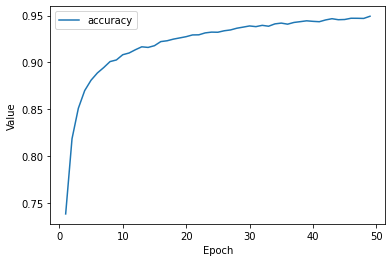

In [20]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

**Optimize the model**

Experiment with the following:

    number of hidden layers
    number of nodes in each layer
    dropout regularization rate


Epoch 1/100
12/12 [==============================] - 1s 69ms/step - loss: 1.3174 - accuracy: 0.5499 - val_loss: 0.4519 - val_accuracy: 0.8760
Epoch 2/100
12/12 [==============================] - 1s 60ms/step - loss: 0.5449 - accuracy: 0.8306 - val_loss: 0.2772 - val_accuracy: 0.9204
Epoch 3/100
12/12 [==============================] - 1s 58ms/step - loss: 0.3938 - accuracy: 0.8814 - val_loss: 0.2122 - val_accuracy: 0.9388
Epoch 4/100
12/12 [==============================] - 1s 60ms/step - loss: 0.3290 - accuracy: 0.9028 - val_loss: 0.1826 - val_accuracy: 0.9479
Epoch 5/100
12/12 [==============================] - 1s 58ms/step - loss: 0.2885 - accuracy: 0.9143 - val_loss: 0.1753 - val_accuracy: 0.9494
Epoch 6/100
12/12 [==============================] - 1s 58ms/step - loss: 0.2622 - accuracy: 0.9220 - val_loss: 0.1564 - val_accuracy: 0.9548
Epoch 7/100
12/12 [==============================] - 1s 60ms/step - loss: 0.2395 - accuracy: 0.9280 - val_loss: 0.1415 - val_accuracy: 0.9596
Epoch 

[0.0987689346075058, 0.9731000065803528]

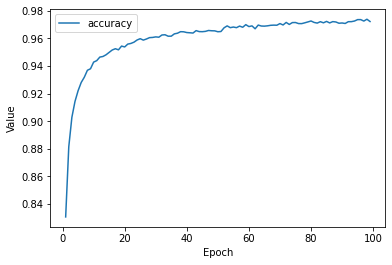

In [38]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.5))

  # Define the second hidden layer.   
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.25))

  

  # Define the second hidden layer.   
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist   




# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 100
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

Epoch 1/100
12/12 [==============================] - 1s 122ms/step - loss: 1.5021 - accuracy: 0.4677 - val_loss: 0.5651 - val_accuracy: 0.8355
Epoch 2/100
12/12 [==============================] - 1s 108ms/step - loss: 0.5239 - accuracy: 0.8405 - val_loss: 0.2769 - val_accuracy: 0.9190
Epoch 3/100
12/12 [==============================] - 1s 102ms/step - loss: 0.3264 - accuracy: 0.9061 - val_loss: 0.1966 - val_accuracy: 0.9417
Epoch 4/100
12/12 [==============================] - 1s 104ms/step - loss: 0.2427 - accuracy: 0.9291 - val_loss: 0.1561 - val_accuracy: 0.9533
Epoch 5/100
12/12 [==============================] - 1s 103ms/step - loss: 0.2030 - accuracy: 0.9407 - val_loss: 0.1432 - val_accuracy: 0.9572
Epoch 6/100
12/12 [==============================] - 1s 104ms/step - loss: 0.1735 - accuracy: 0.9492 - val_loss: 0.1246 - val_accuracy: 0.9628
Epoch 7/100
12/12 [==============================] - 1s 104ms/step - loss: 0.1565 - accuracy: 0.9531 - val_loss: 0.1111 - val_accuracy: 0.9674

[0.078484445810318, 0.9814000129699707]

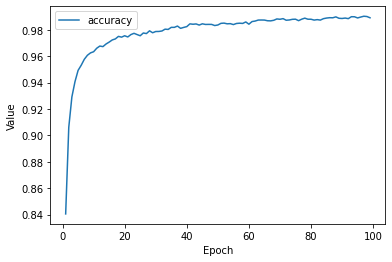

In [47]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.5))

  # Define the second hidden layer.   
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  
  # Define a dropout regularization layer. 
  #model.add(tf.keras.layers.Dropout(rate=0.5))

   # Define the third hidden layer.   
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  
  # Define a dropout regularization layer. 
  #model.add(tf.keras.layers.Dropout(rate=0.1))

  # Define the fourth hidden layer.   
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist   




# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 100
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

In [41]:
3/16

0.1875